# 作業

練習以旋轉變換 + 平移變換來實現仿射變換
> 旋轉 45 度 + 縮放 0.5 倍 + 平移 (x+100, y-50)

In [30]:
import cv2
import time
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/Lena-2019-CMS-Source2_WEB.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

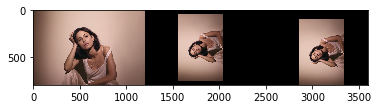

In [47]:
#取得 rows, cols,
rows, cols = img.shape[:2]
#取得旋轉矩陣
M_rotation = cv2.getRotationMatrix2D((cols//2,rows//2), 90, 0.6)
#取得平移矩陣
M_translate = np.array([[1,0,100],[0,1,50]], dtype = np.float32)
#旋轉
spin = cv2.warpAffine(img, M_rotation, (cols,rows))
#平移
translate_spin = cv2.warpAffine(spin, M_translate, (cols, rows))
#組合 + 顯示圖片
newImage = np.hstack((img,spin,translate_spin))

plt.imshow(newImage)



Rotation Matrix
[[  0.35355339   0.35355339  74.98066402]
 [ -0.35355339   0.35355339 256.        ]]

Translation Matrix
[[  1.   0. 100.]
 [  0.   1. -50.]]


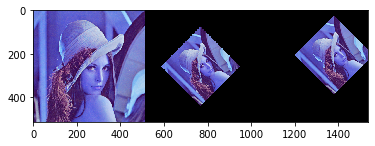

In [12]:
rows, cols = img.shape[:2]

# 取得旋轉矩陣
# getRotationMatrix2D(center, angle, scale)
#cv2.getRotationMatrix2D(中⼼心位置, 旋轉⾓角度, 縮放倍率
M_rotate = cv2.getRotationMatrix2D((cols//2, rows//2), 45, 0.5)
print('Rotation Matrix')
print(M_rotate)
print()

# 取得平移矩陣
M_translate = np.array([[1, 0, 100], [0, 1, -50]], dtype=np.float32)
print('Translation Matrix')
print(M_translate)

# 旋轉
img_rotate = cv2.warpAffine(img, M_rotate, (cols, rows))

# 平移
img_rotate_trans = cv2.warpAffine(img_rotate, M_translate, (cols, rows))

# 組合 + 顯示圖片
img_show_rotate_trans = np.hstack((img, img_rotate, img_rotate_trans))
plt.imshow(img_show_rotate_trans)

In [14]:
# 給定兩兩一對，共三對的點
# 這邊我們先用手動設定三對點，一般情況下會有點的資料或是透過介面手動標記三個點
rows, cols = img.shape[:2]
pt1 = np.array([[50,50], [300,100], [200,300]], dtype=np.float32)
pt2 = np.array([[80,80], [330,150], [300,300]], dtype=np.float32)

# 取得 affine 矩陣並做 affine 操作
M_affine = np.array([pt1, pt2], dtype=np.float32)

In [21]:
pt1

array([[ 50.,  50.],
       [300., 100.],
       [200., 300.]], dtype=float32)

## Affine Transformation - Case 2: any three point

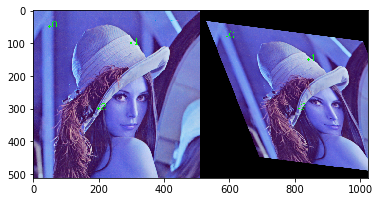

In [26]:
# 給定兩兩一對，共三對的點
# 這邊我們先用手動設定三對點，一般情況下會有點的資料或是透過介面手動標記三個點
rows, cols = img.shape[:2]
pt1 = np.array([[50,50], [300,100], [200,300]], dtype=np.float32)
pt2 = np.array([[80,80], [330,150], [300,300]], dtype=np.float32)

# 取得 affine 矩陣並做 affine 操作

M_affine = cv2.getAffineTransform(pt1,pt2)
img_affine = cv2.warpAffine(img, M_affine, (cols, rows))

# 在圖片上標記點
img_copy = img.copy()
for idx, pts in enumerate(pt1):
    pts = tuple(map(int, pts))
    cv2.circle(img_copy, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_copy, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

for idx, pts in enumerate(pt2):
    pts = tuple(map(int, pts))
    cv2.circle(img_affine, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_affine, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

# 組合 + 顯示圖片
img_show_affine = np.hstack((img_copy, img_affine))
plt.imshow(img_show_affine)